<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [ ]:
!pip install pandas

### Step 1: Import Required Libraries


In [1]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [ ]:
## Write your code here
print(f"Duplicates before removal : {df.duplicated().sum()}")

np.int64(20)

##### Task 2: Remove the duplicate rows from the dataframe.



In [6]:
## Write your code here
df.drop_duplicates(keep='first', inplace=True)

In [7]:
print(f"Duplicates after removal : {df.duplicated().sum()}")

Duplicates after removal : 0


### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [9]:
## Write your code here

pd.set_option('display.max_rows', None)
print("The number of missing rows in each column: ")
df.isnull().sum()

The number of missing rows in each column: 


ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [10]:
## Write your code here
print(f"The number of missing rows in column 'RemoteWork': {df["RemoteWork"].isnull().sum()}")

The number of missing rows in column 'RemoteWork': 10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [11]:
## Write your code here
print("The value counts for column 'RemoteWork': ")
df["RemoteWork"].value_counts()

The value counts for column 'RemoteWork': 


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [12]:
## Write your code here
most_freq_RemoteWork = df["RemoteWork"].value_counts().idxmax()
print(f"The most frequent value in 'RemoteWork': {most_freq_RemoteWork}")

The most frequent value in 'RemoteWork': Hybrid (some remote, some in-person)


##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [13]:
## Write your code here
df["RemoteWork"] = df["RemoteWork"].fillna(most_freq_RemoteWork)

print(f"The number of missing rows in column 'RemoteWork' after imputation: {df["RemoteWork"].isnull().sum()}")

The number of missing rows in column 'RemoteWork' after imputation: 0


##### Task 8: Check for any compensation-related columns and describe their distribution.



In [15]:
## Write your code here
keywords = ["Comp", "Salary", "Income"]

compensation_columns = [col for col in df.columns if any(word in col for word in keywords)]
compensation_columns

['CompTotal', 'AIComplex', 'ConvertedCompYearly']

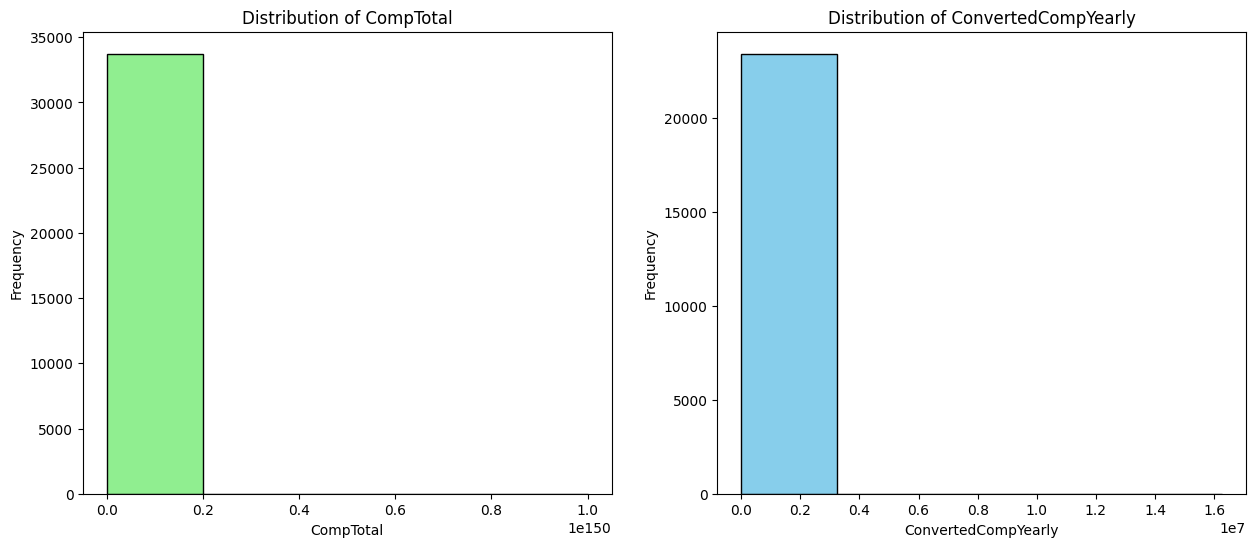

In [20]:
# Distribution of CompTotal and ConvertedCompYearly

import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(df["CompTotal"], bins=5, color='lightgreen', edgecolor='black')
plt.title("Distribution of CompTotal")
plt.xlabel("CompTotal")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(df["ConvertedCompYearly"], bins=5, color='skyblue', edgecolor = 'black')
plt.title("Distribution of ConvertedCompYearly")
plt.xlabel("ConvertedCompYearly")
plt.ylabel("Frequency")

plt.show()

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
